# Objective
1. load data
2. analyze data
3. predict y (yes/no)

# load data

In [ ]:
import pandas as pd
import numpy as np
bank = pd.read_csv('https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/AI_For_Engineering_2020/bank-marketing/bank-additional-full.csv', sep = ';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no


# Analyze data

In [ ]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#shape
bank.shape

(41188, 21)

In [ ]:
#find all unique catagorical data
obj=[]
for i in list(bank.columns):
  if bank[i].dtype == 'O':
    obj.append(i)
    print(i+ ': '+ str(bank[i].unique()) +'\n' )


job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: ['no' 'unknown' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome: ['nonexistent' 'failure' 'success']

y: ['no' 'yes']



# Handling missing data

In [ ]:
#there are some 'unknown' data
#drop all unknown row
bank[bank !='unknown'].dropna().shape

(30488, 21)

In [ ]:
bank_no_unknown=bank[bank !='unknown'].dropna()
bank_no_unknown.shape

(30488, 21)

In [ ]:
bank_no_unknown.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no


In [ ]:
#unknown check 
for i in list(bank_no_unknown.columns):
  if bank_no_unknown[i].dtype == 'O':
    print(i+ ': '+ str(bank_no_unknown[i].unique()) +'\n' )


job: ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']

marital: ['married' 'single' 'divorced']

education: ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']

default: ['no' 'yes']

housing: ['no' 'yes']

loan: ['no' 'yes']

contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome: ['nonexistent' 'failure' 'success']

y: ['no' 'yes']



# Distribution plot

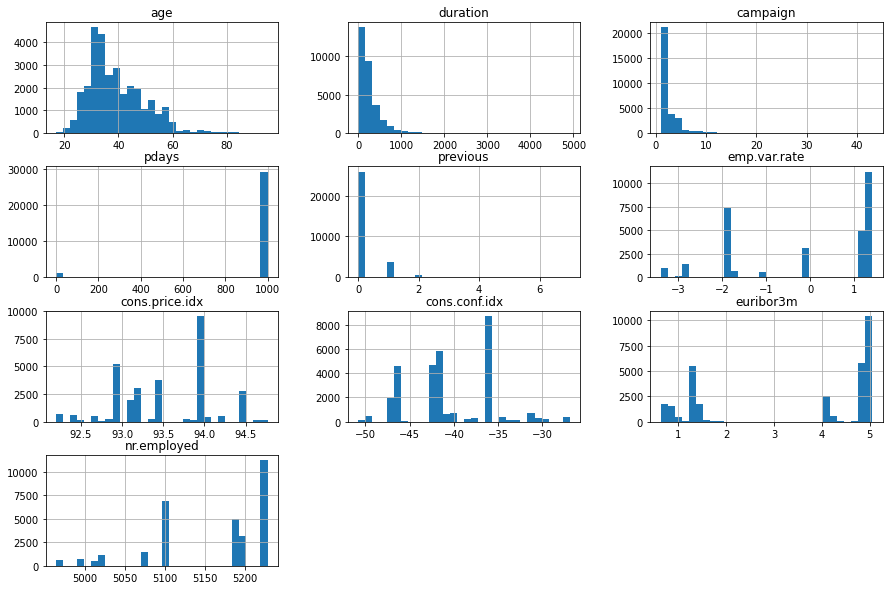

In [ ]:
#distribution plot of all numeric data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
bank_no_unknown.hist(bins=30,figsize=(15,10),grid=True);

In [ ]:
#no of catagorical data
len(obj)

11

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

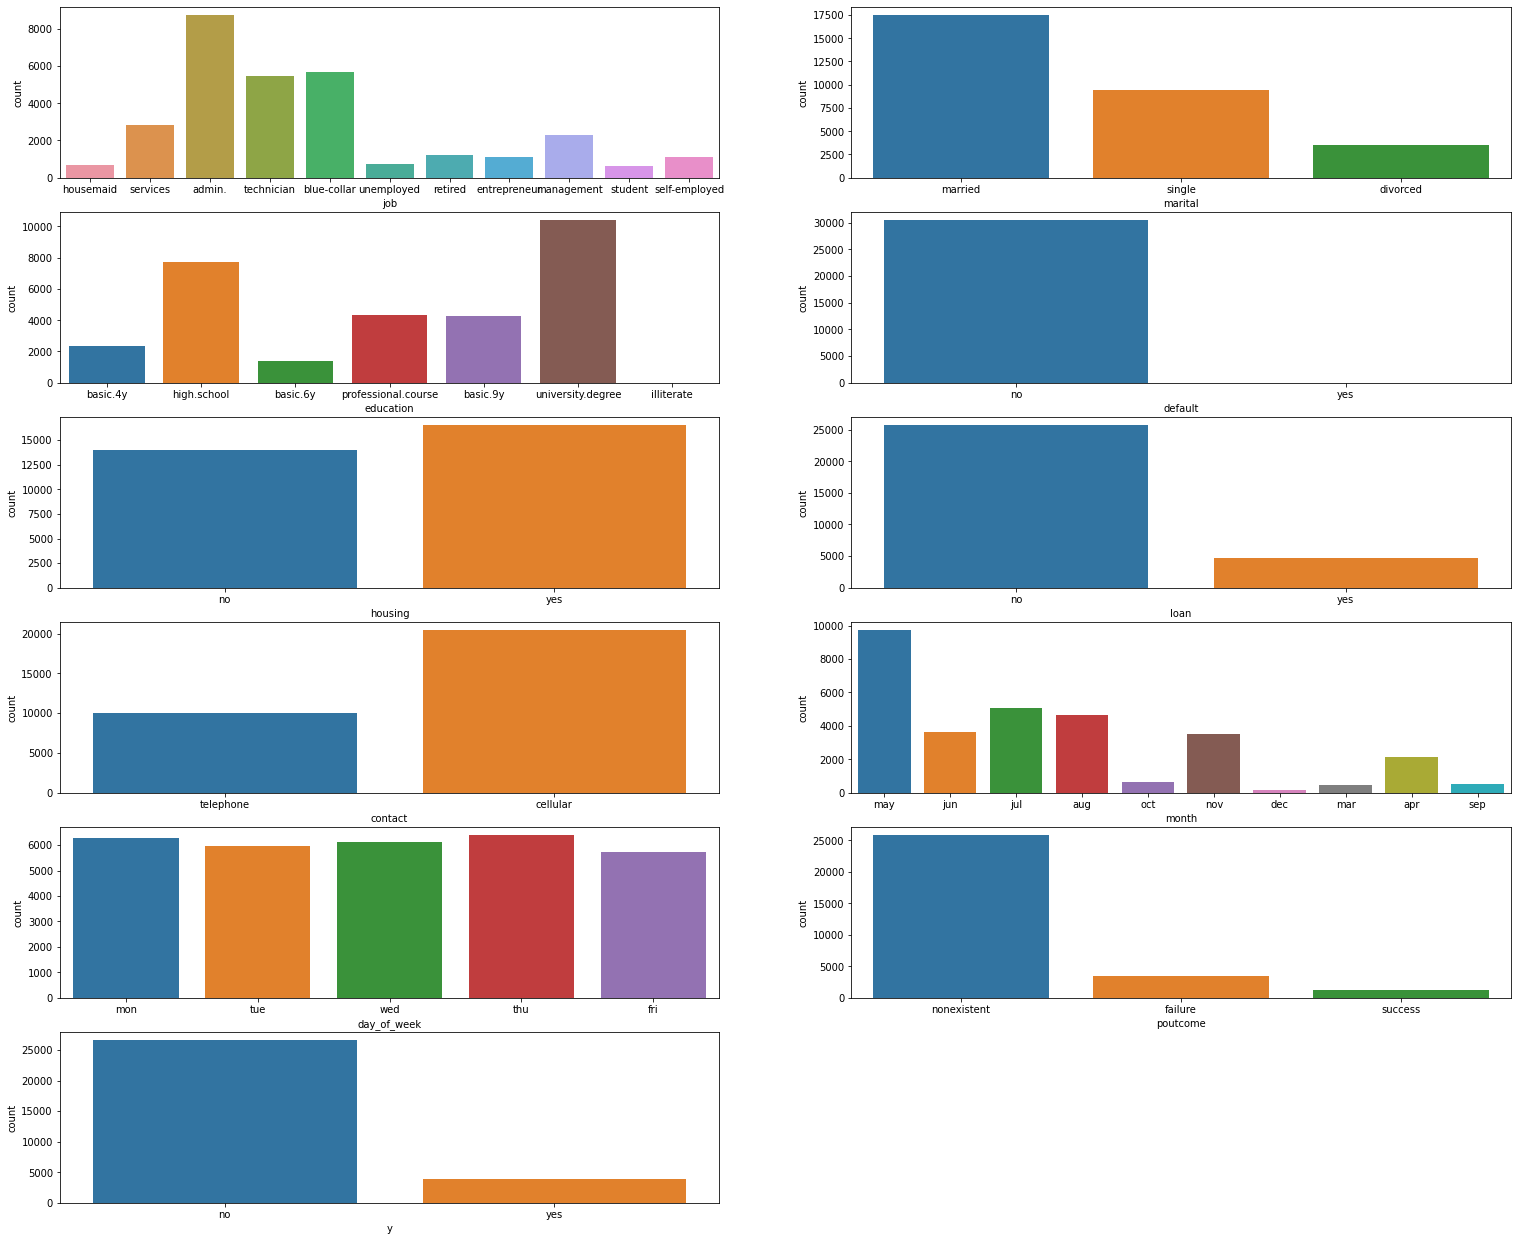

In [ ]:
#distribution of catagorical variables
plt.figure(figsize=(26,22))
for i in range(len(obj)):
  plt.subplot(6, 2, i+1)
  sns.countplot(bank_no_unknown[obj[i]])

# Handling catagorical data

In [ ]:
#catagorical data to numerical data using dummies

for i in range(len(obj)):
  dummy1=pd.get_dummies(bank_no_unknown[obj[i]], prefix=obj[i])
  bank_no_unknown= pd.concat([bank_no_unknown, dummy1], axis = 1)
  bank_no_unknown.drop([obj[i]], axis = 'columns', inplace=True) 

In [ ]:
bank_no_unknown.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.99,-36.4,4.86,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.99,-36.4,4.86,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.99,-36.4,4.86,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.99,-36.4,4.86,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
6,59,139,1,999,0,1.1,93.99,-36.4,4.86,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


# Correlation plot

In [ ]:
# correlation
from pandas import set_option
set_option('precision', 2)
bank_no_unknown.corr(method='pearson')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
age,1.00e+00,7.91e-03,-2.36e-03,-5.09e-02,4.92e-02,-5.04e-02,-3.58e-02,1.25e-01,-3.65e-02,-6.46e-02,-9.11e-02,-4.01e-02,3.48e-02,8.31e-02,6.91e-02,4.77e-01,-3.89e-03,-7.06e-02,-1.89e-01,-6.46e-02,-6.84e-03,1.86e-01,2.64e-01,-4.12e-01,2.45e-01,2.13e-02,-2.88e-02,-9.51e-02,9.64e-03,1.19e-02,-4.91e-02,-3.17e-03,3.17e-03,-4.66e-03,4.66e-03,1.09e-02,-1.09e-02,1.20e-02,-1.20e-02,3.04e-02,5.71e-02,4.94e-02,-6.47e-02,-2.07e-02,1.49e-02,-7.59e-02,5.22e-02,6.42e-02,5.25e-02,8.12e-04,2.08e-02,-1.92e-02,2.00e-02,-2.21e-02,1.78e-02,-4.29e-02,5.04e-02,-4.87e-02,4.87e-02
duration,7.91e-03,1.00e+00,-6.84e-02,-4.62e-02,1.88e-02,-2.34e-02,1.28e-02,-9.52e-03,-2.89e-02,-4.04e-02,-6.12e-03,1.50e-02,1.24e-03,-1.76e-03,-4.59e-03,1.42e-02,2.59e-03,3.95e-03,1.17e-02,-1.85e-02,-5.02e-03,-3.88e-03,2.27e-03,2.72e-04,8.80e-03,4.53e-03,4.58e-03,1.19e-02,-1.29e-03,-1.01e-02,-1.37e-02,5.92e-03,-5.92e-03,7.81e-03,-7.81e-03,-6.32e-03,6.32e-03,2.90e-02,-2.90e-02,3.66e-02,-4.37e-02,2.12e-02,3.25e-02,-1.82e-02,-7.62e-03,2.16e-03,-1.87e-02,1.87e-02,1.50e-02,-1.29e-02,-2.47e-02,1.90e-02,1.31e-03,1.69e-02,-1.55e-02,-1.07e-02,4.52e-02,-3.94e-01,3.94e-01
campaign,-2.36e-03,-6.84e-02,1.00e+00,5.43e-02,-8.08e-02,1.58e-01,1.27e-01,-1.17e-02,1.41e-01,1.48e-01,1.72e-02,-4.78e-03,-7.07e-03,-4.77e-03,-1.14e-02,-6.23e-03,8.08e-03,3.36e-03,-2.46e-02,5.34e-03,-4.77e-03,8.35e-03,-3.81e-03,-1.72e-03,-7.82e-03,-7.69e-04,-5.79e-03,2.45e-03,-3.64e-03,4.28e-03,3.75e-03,4.33e-03,-4.33e-03,1.12e-02,-1.12e-02,-6.60e-03,6.60e-03,-7.99e-02,7.99e-02,-5.75e-02,2.49e-02,-1.09e-02,1.04e-01,5.86e-02,-1.39e-02,-2.41e-02,-8.27e-02,-5.23e-02,-3.51e-02,2.75e-02,1.19e-02,1.19e-02,-2.88e-02,-2.24e-02,-6.91e-02,8.92e-02,-5.23e-02,6.92e-02,-6.92e-02
pdays,-5.09e-02,-4.62e-02,5.43e-02,1.00e+00,-5.90e-01,2.69e-01,6.80e-02,-1.02e-01,2.95e-01,3.71e-01,-1.95e-02,5.65e-02,1.99e-02,-8.00e-03,1.98e-03,-8.08e-02,1.38e-02,3.15e-02,-8.52e-02,1.23e-02,-3.19e-02,1.19e-02,2.11e-02,-3.08e-02,-1.31e-02,1.68e-02,3.58e-02,7.77e-03,4.03e-03,8.33e-04,-3.41e-02,-2.10e-03,2.10e-03,7.54e-03,-7.54e-03,-3.06e-03,3.06e-03,-1.15e-01,1.15e-01,-4.57e-03,-4.16e-03,-7.29e-02,4.75e-02,1.01e-02,-6.25e-02,7.33e-02,-1.16e-02,-1.20e-01,-1.47e-01,1.05e-02,3.94e-03,-1.08e-02,-4.95e-03,1.67e-03,1.54e-02,4.99e-01,-9.52e-01,3.28e-01,-3.28e-01
previous,4.92e-02,1.88e-02,-8.08e-02,-5.90e-01,1.00e+00,-4.04e-01,-1.77e-01,-2.79e-02,-4.39e-01,-4.88e-01,1.27e-02,-4.33e-02,-1.41e-02,-5.08e-03,3.33e-03,7.37e-02,-1.22e-02,-1.18e-02,9.03e-02,-2.51e-02,1.21e-02,-5.52e-03,-2.90e-02,3.48e-02,5.06e-03,-1.47e-02,-2.56e-02,1.13e-02,-3.76e-03,-1.16e-02,2.07e-02,-2.64e-03,2.64e-03,-2.11e-02,2.11e-02,3.51e-03,-3.51e-03,2.02e-01,-2.02e-01,6.35e-02,-4.96e-02,5.83e-02,-1.15e-01,-6.15e-02,5.85e-02,-1.24e-02,7.26e-02,1.20e-01,1.46e-01,3.86e-03,-3.70e-03,4.87e-03,8.08e-04,-5.78e-03,6.71e-01,-8.76e-01,5.27e-01,-2.28e-01,2.28e-01
emp.var.rate,-5.04e-02,-2.34e-02,1.58e-01,2.69e-01,-4.04e-01,1.00e+00,7.66e-01,1.58e-01,9.69e-01,9.00e-01,-8.01e-03,3.74e-02,1.48e-02,2.80e-02,-9.98e-03,-1.29e-01,-8.12e-04,2.16e-02,-1.28e-01,6.99e-02,-3.25e-02,3.04e-02,5.05e-02,-7.51e-02,-1.88e-02,1.38e-02,1.99e-02,-6.52e-03,-3.55e-03,3.23e-02,-2.77e-02,-5.98e-03,5.98e-03,5.92e-02,-5.92e-02,-2.02e-

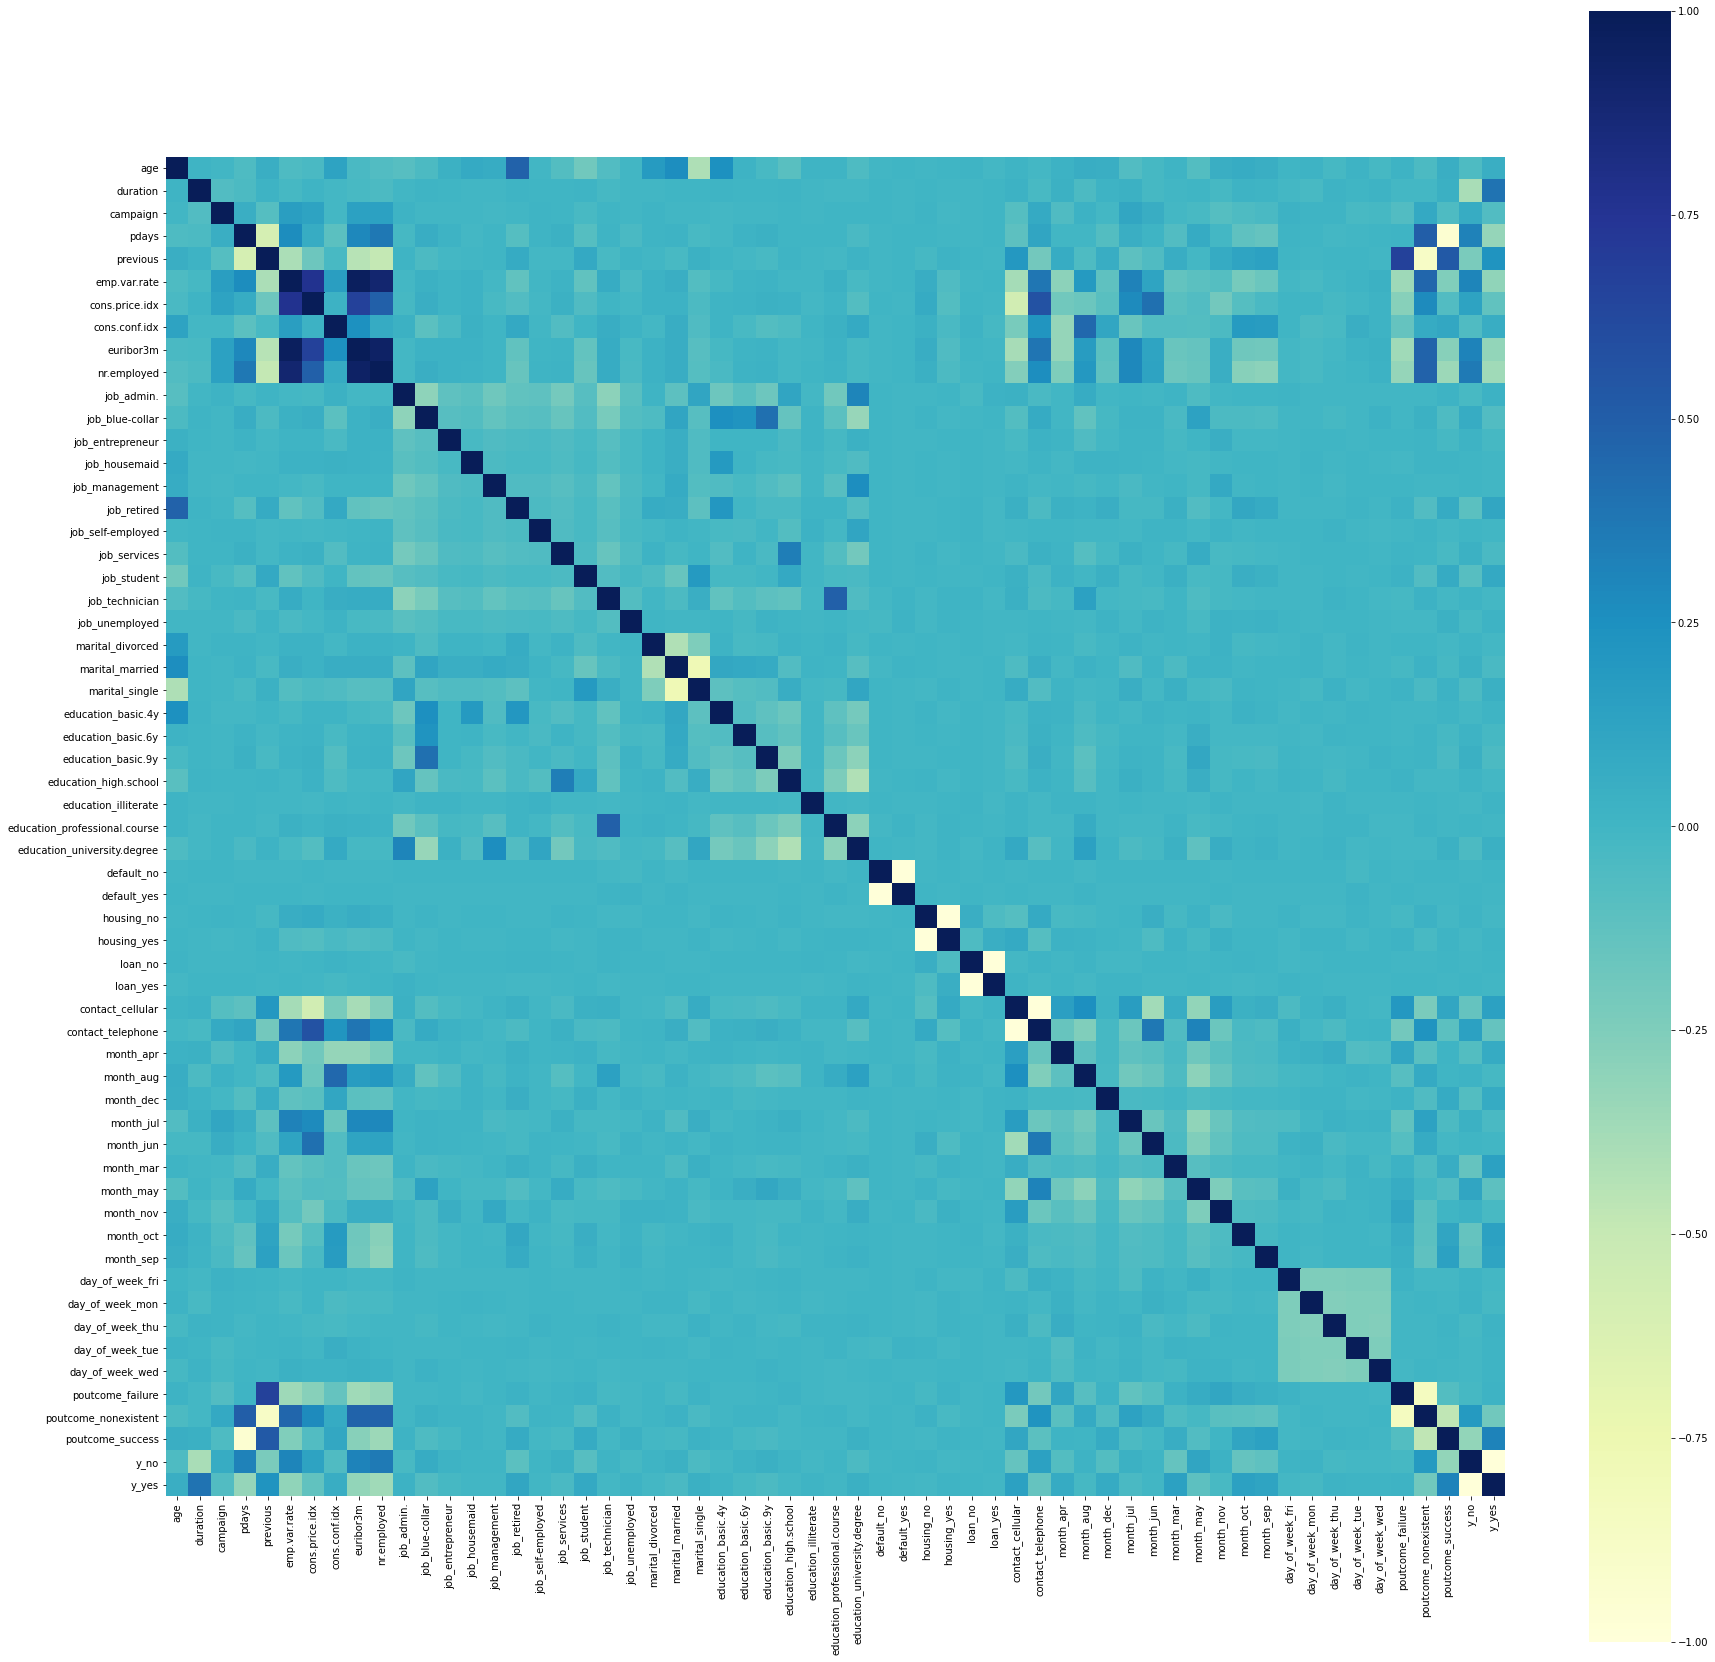

In [ ]:
#code for correlation plot
plt.figure(figsize=(30,30))
#library to establish correlation
import seaborn as sns
names = []
#creating a correlation matrix
correlations = bank_no_unknown.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#corr sorting
bank_no_unknown.corr()['y_yes'].sort_values(ascending=False)

y_yes                            1.00e+00
duration                         3.94e-01
poutcome_success                 3.20e-01
previous                         2.28e-01
month_mar                        1.46e-01
contact_cellular                 1.44e-01
month_oct                        1.41e-01
month_sep                        1.24e-01
job_retired                      1.02e-01
job_student                      8.86e-02
month_apr                        7.78e-02
month_dec                        7.46e-02
cons.conf.idx                    6.16e-02
age                              4.87e-02
education_university.degree      4.66e-02
marital_single                   4.22e-02
job_admin.                       2.40e-02
poutcome_failure                 2.17e-02
job_unemployed                   2.09e-02
day_of_week_thu                  1.69e-02
housing_yes                      1.01e-02
education_basic.4y               9.10e-03
day_of_week_tue                  8.77e-03
education_illiterate             8

# Train a model

In [ ]:
#define x and y
y=bank_no_unknown['y_yes']
x=bank_no_unknown.drop(['y_yes','y_no'],axis='columns')
x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.99,-36.4,4.86,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.99,-36.4,4.86,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.99,-36.4,4.86,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.99,-36.4,4.86,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.99,-36.4,4.86,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
y.head()

0    0
2    0
3    0
4    0
6    0
Name: y_yes, dtype: uint8

In [ ]:
#split data (train/test)

from sklearn.model_selection import train_test_split
#testing data size is of 20% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2, random_state =5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
logmodel = LogisticRegression()  
logmodel.fit(x_train,y_train)
logpred = logmodel.predict(x_test)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#compare actual vs predict

pd.DataFrame({"Actual": y_test, "Predict": logpred}).head()

,Actual,Predict
14599,0,0
811,0,0
37310,1,0
13223,1,0
19566,0,0


# Evauation

In [ ]:
print(confusion_matrix(y_test, logpred))

[[5185  169]
 [ 447  297]]


In [ ]:
print(accuracy_score(y_test, logpred))

0.8989832732043292


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logpred, digits=4))

              precision    recall  f1-score   support

           0     0.9206    0.9684    0.9439      5354
           1     0.6373    0.3992    0.4909       744

    accuracy                         0.8990      6098
   macro avg     0.7790    0.6838    0.7174      6098
weighted avg     0.8861    0.8990    0.8887      6098



In [ ]:
#acc = 0.90 (acceptable !)

# Logistic regression parameters

In [ ]:
logmodel.coef_

array([[ 3.02826123e-03,  4.49301837e-03, -6.99513862e-02,
        -1.53109362e-03,  1.47966373e-02, -2.58603698e-01,
         1.97558874e-01,  3.94063202e-02, -2.74888077e-01,
        -3.57107964e-03,  1.04918654e-02, -1.72623945e-02,
        -2.02179407e-03, -3.81013095e-04, -3.34778203e-04,
         8.24476323e-03,  6.86072811e-04, -5.30406500e-03,
         7.45060298e-03, -7.84549079e-04,  1.82155341e-03,
        -3.88291307e-03, -1.29944035e-02,  1.94835805e-02,
        -1.43890321e-03, -2.70114698e-03, -1.01852822e-02,
        -6.11515085e-04,  9.94688578e-05,  2.26450310e-04,
         1.72171922e-02,  2.62009522e-03, -1.38313169e-05,
        -5.50353615e-03,  8.10980005e-03,  4.84131669e-03,
        -2.23505279e-03,  3.72377356e-02, -3.46314717e-02,
         1.19800200e-02,  1.02528584e-03,  2.06677882e-03,
        -6.08017736e-03,  3.81929121e-03,  1.52651437e-02,
        -3.82769882e-02, -6.08970924e-03,  1.17183288e-02,
         7.17829031e-03, -2.76162161e-03, -2.93471706e-0

In [ ]:
logmodel.intercept_

array([0.00260633])